In [1]:
import numpy as np

data=np.load('../res/Data/data.npy')
target=np.load('../res/Data/target.npy')
data.shape[1:]

(50, 50, 1)

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, Dropout

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
history=model.fit(train_data,train_target, validation_data=(test_data,test_target), epochs=87)

Epoch 1/87
148/148 [==============================] - 8s 40ms/step - loss: 2.0772 - accuracy: 0.1538 - val_loss: 1.9823 - val_accuracy: 0.2229
Epoch 2/87
148/148 [==============================] - 5s 32ms/step - loss: 1.9928 - accuracy: 0.2219 - val_loss: 1.8854 - val_accuracy: 0.2343
Epoch 3/87
148/148 [==============================] - 5s 32ms/step - loss: 1.8961 - accuracy: 0.2649 - val_loss: 1.8432 - val_accuracy: 0.2724
Epoch 4/87
148/148 [==============================] - 5s 32ms/step - loss: 1.8396 - accuracy: 0.2805 - val_loss: 1.7488 - val_accuracy: 0.3200
Epoch 5/87
148/148 [==============================] - 5s 32ms/step - loss: 1.7743 - accuracy: 0.3302 - val_loss: 1.6358 - val_accuracy: 0.3600
Epoch 6/87
148/148 [==============================] - 5s 32ms/step - loss: 1.6585 - accuracy: 0.3713 - val_loss: 1.4982 - val_accuracy: 0.4419
Epoch 7/87
148/148 [==============================] - 5s 32ms/step - loss: 1.5647 - accuracy: 0.4170 - val_loss: 1.3920 - val_accuracy: 0.4571

Epoch 58/87
148/148 [==============================] - 5s 32ms/step - loss: 0.1592 - accuracy: 0.9521 - val_loss: 1.0194 - val_accuracy: 0.6952
Epoch 59/87
148/148 [==============================] - 5s 32ms/step - loss: 0.1538 - accuracy: 0.9561 - val_loss: 0.9161 - val_accuracy: 0.7295
Epoch 60/87
148/148 [==============================] - 5s 32ms/step - loss: 0.1607 - accuracy: 0.9479 - val_loss: 1.0119 - val_accuracy: 0.7143
Epoch 61/87
148/148 [==============================] - 5s 32ms/step - loss: 0.1691 - accuracy: 0.9516 - val_loss: 1.0972 - val_accuracy: 0.6990
Epoch 62/87
148/148 [==============================] - 5s 32ms/step - loss: 0.1521 - accuracy: 0.9528 - val_loss: 1.0179 - val_accuracy: 0.7238
Epoch 63/87
148/148 [==============================] - 5s 32ms/step - loss: 0.1524 - accuracy: 0.9558 - val_loss: 0.9756 - val_accuracy: 0.7105
Epoch 64/87
148/148 [==============================] - 5s 32ms/step - loss: 0.1436 - accuracy: 0.9600 - val_loss: 1.0794 - val_accuracy:

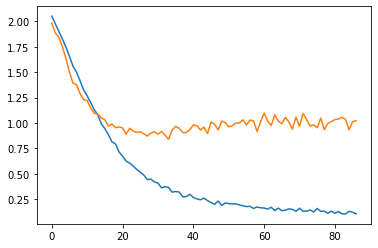

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

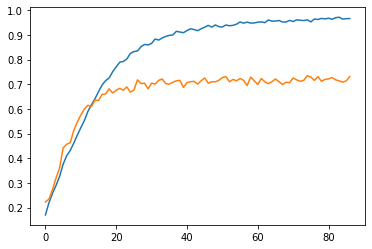

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [7]:
accc = model.evaluate(test_data,test_target)
print(accc)

17/17 [==============================] - 0s 10ms/step - loss: 1.0228 - accuracy: 0.7314
[1.0227822065353394, 0.7314285635948181]


In [8]:
model.save_weights(f'../res/Models/modelAgeGender-{accc[1]}.h5')